In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'data\Position_Salaries.csv')
x= dataset.iloc[:,1:-1].values
y= dataset.iloc[:, -1].values
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
y=y.reshape(len(y),1) # Conversion to 2D array is required because StandardScaler class in feature scaling expects only 2D arrays
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
sc_y = StandardScaler() #We cant use same variable of standard scaler for both matrices because x,y dont have same range of mean values
y = sc_y.fit_transform(y)

In [5]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [6]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


SVR Model

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y.ravel())

SVR()

In [8]:
sc_y.inverse_transform((regressor.predict(sc_x.transform([[6.5]]))))

array([170370.0204065])

Visualisation

Text(0, 0.5, 'salary')

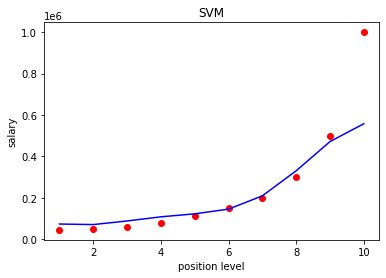

In [9]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)), color = 'blue') #Dont apply inverse to x coz prediction's scle will change. Rather apply inverse after prediction is done i.e., only to output plots value
plt.title('SVM')
plt.xlabel('position level')
plt.ylabel('salary')

Increasing resolution

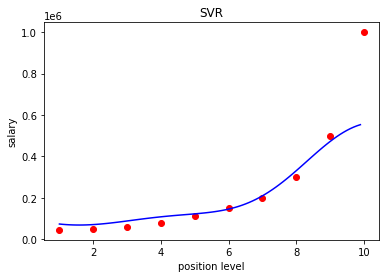

In [10]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(x_grid,sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid))), color = 'blue')
plt.title('SVR')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()